In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x) 

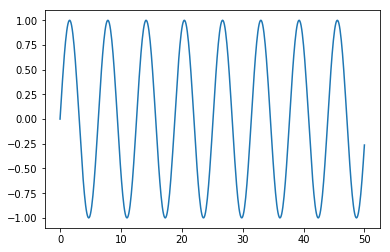

In [3]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [6]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [7]:
test_percent = 0.1

In [9]:
len(df)*test_percent

50.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_ind = int(len(df)-test_point)
test_ind

451

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(train)

In [14]:
x_test = scaler.transform(test)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(x_train,x_train,length=length,batch_size=batch_size)

In [41]:
X,y=generator[0]

In [42]:
X 

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [43]:
y

array([[0.79923759]])

In [44]:
len(x_train)

451

In [45]:
x_train[450]

array([0.92545429])

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [47]:
n_features = 1

In [49]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam' ,loss='mse')

In [50]:
model.fit_generator(generator,epochs=5)

Epoch 1/5
426/426 [==============================] - 3s 7ms/step - loss: 0.0019
Epoch 2/5
426/426 [==============================] - 2s 5ms/step - loss: 7.6992e-05
Epoch 3/5
426/426 [==============================] - 2s 5ms/step - loss: 3.6854e-04
Epoch 4/5
426/426 [==============================] - 2s 5ms/step - loss: 1.9100e-05
Epoch 5/5
426/426 [==============================] - 2s 5ms/step - loss: 8.1782e-06


In [51]:
losses = pd.DataFrame(model.history.history)

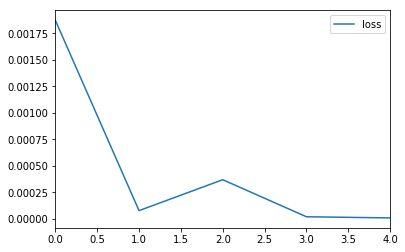

In [52]:
losses.plot()

In [53]:
first_eval_batch = x_train[-length:]

In [59]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [60]:
model.predict(first_eval_batch)

array([[0.95379245]], dtype=float32)

In [63]:
x_test[0]

array([0.94955134])

In [64]:
test_predictions = []
first_eval_batch = x_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [65]:
test_predictions

[array([0.95379245], dtype=float32),
 array([0.97517836], dtype=float32),
 array([0.9925609], dtype=float32),
 array([1.0046093], dtype=float32),
 array([1.0130236], dtype=float32),
 array([1.0163223], dtype=float32),
 array([1.0147107], dtype=float32),
 array([1.0085139], dtype=float32),
 array([0.9969834], dtype=float32),
 array([0.9821412], dtype=float32),
 array([0.9625503], dtype=float32),
 array([0.9391043], dtype=float32),
 array([0.9119868], dtype=float32),
 array([0.88173294], dtype=float32),
 array([0.8486577], dtype=float32),
 array([0.8123553], dtype=float32),
 array([0.7737913], dtype=float32),
 array([0.7328764], dtype=float32),
 array([0.69078714], dtype=float32),
 array([0.64705503], dtype=float32),
 array([0.6017874], dtype=float32),
 array([0.5561343], dtype=float32),
 array([0.509811], dtype=float32),
 array([0.4639633], dtype=float32),
 array([0.41822597], dtype=float32),
 array([0.37317163], dtype=float32),
 array([0.32925534], dtype=float32),
 array([0.2870596], d

In [66]:
true_pre = scaler.inverse_transform(test_predictions)

In [68]:
test['Predictions'] = true_pre

C:\Users\pundi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
test.head()

,Sine,Predictions
45.1,0.899097,0.907579
45.2,0.938307,0.950351
45.3,0.968142,0.985116
45.4,0.988304,1.009212
45.5,0.998591,1.026041


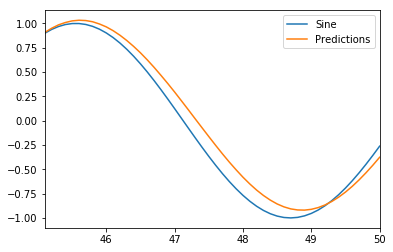

In [70]:
test.plot()